![Astrofisica Computacional](data/logo.PNG)

---
## 07. Ecuaciones Diferenciales Ordinarias I


Code by Carlos Andrés del Valle (cdelv@unal.edu.co)

Theory by Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno se presentarán algunos de los métodos para resolver un sistema de ecuaciones diferenciales Ordinarias.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3 `

---

## Ecuaciones Diferenciales Ordinarias (ODE)

Un sistema de ecuaciones deiferenciales ordinarias (ODEs) de primer orden es una relación entre una función (vectorial) desconocida $y(x)$ y su derivada $y^\prime(x)$. Un sistema general de  ODEs de primer orden se puede escribir en la forma

\begin{equation}
y^\prime (x) =f(x,y(x))\,.
\end{equation}

Una solución de la ecuación diferencial es una función $y(x)$ que satisface la ODE.

En general, se tienen dos clases de problemas de ODE de primer orden:

1. Problemas de valor inicial : $y(x_i)$ es dado en un punto inicial $x_i$.

2. Problemas de valor de frontera (en dos puntos): $y$ es conicida en dos extremos (fronteras) del dominio y estas **condiciones de frontera** deben satisfacerse simultáneamente.



---
### Reducción a un problema de ODE de primer orden

Cualquier ODE puede reducirse a un problema de primer orden introduciendo variables adicionales.

#### Ejemplo

\begin{equation}
y''(x) + q(x) y'(x) = r(x)\,\,.
\end{equation}

Introduciendo una nueva función $z(x)$, este sistema se puede escribir como un sistema de ODE de primer orden,

\begin{align}
\text{(1)}\,\, y'(x) &= z(x)\\
\text{(2)}\,\, z'(x) &= r(x) - q(x) z(x).
\end{align}

---
## Métodos Explícitos e Implícitos para resolver ODEs

En terminos generales, los métodos para integrar un sistema de ODEs se clasifican en *explícitos* e *implícitos*.

Los métodos explícitos utilizan diferencias para construir y actualizar la solución utilizando los valores actuales y previos de las variables. Algunos ejemplos de métodos explícitos son el método de Euler y los métodos Runge-Kutta.

Los métodos implícitos evaluan el lado derecho de las ecuaciones diferenciales utilizando el nuevo valor de la función que se está buscando.

--- 
## Errores y ODEs

Todos los procedimientos para resolver numéricamente un sistema de ODEs de valor inicial implícan la transformación delas ecuaciioines diferenciales continuas en un proceso iterativo discreto que comienza a partir de una condición incial y retorna los valores de la función $y(x)$ en puntos $x_m = x_0 + m * h$, donde $h$ es el paso de discretización (el cual se asumirá como constante en esta descripción).

Dos clases de error pueden surgir en estos procedimientos: 

1. **Error de redondeo.** Debido a la precicisión limitada de los números de punto flotante. El error de redondeo global es la sumade los errores de punto flotante locales (en cada paso de la iteración).


2. **Error de truncamiento.** 

* Local: El error asociado con cada uno de los pasos cuando se reemplaza la descripción continua (e.g. una derivada) con una descripción discreta (e.g., diferencias finitas).

* Global: Si el error de truncamiento local es $\mathcal{O}(h^{n+1})$, entonces el error de truncamiento global será $\mathcal{O}(h^n)$ porque el número de pasos utilizados para evaluar las derivadas hasta alcanzar un punto arbitrario $x_f$, comenzando desde $x_0$, es $\frac{x_f - x_0}{h}$.

---
---

## Método de Euler

Considere el siguiente sistema de ODEs,

\begin{equation}
y' = f(x,y)
\end{equation}

con la condición inicial $y(x_0) = y_0$. Introduciremos un tamaño de paso fijo $\Delta x$ y se obtendrá un estimado para $y(x)$ en el punto $x_1 = x_0 + \Delta x$ utilizando el teorema de Taylor,

\begin{equation}
\begin{aligned}
y(x_1) &= y(x_0+\Delta x) = y(x_0) + y'(x_0) \Delta x + \mathcal{O}(\Delta x^2)\,,\\
       &= y(x_0) + \Delta x f(x_0,y(x_0)) +  \mathcal{O}(\Delta x^2)\,.
\end{aligned}
\end{equation}


De la misma forma, se obtiene el valor $y_{n+1}$ de la función en el punto $x_{n+1} = x_0 + (n+1) \Delta x$ mediante

\begin{equation}
y_{n+1} = y(x_{n+1}) = y_n + \Delta x f(x_n,y(x_n)) + \mathcal{O}(\Delta x^2)\,.
\end{equation}


Este se conoce como el **método de forward Euler**.

---
El método de Euler es extremadamente simple, pero puede ser impreciso y potencialmente inestable.

El error de este método escala como $\propto \Delta x^2$ localmente. Sin embargo, si $L$ es la longitud del dominio, entonces $\Delta x = L / N$, donde $N$ es el número de sub-intervalos definidos en el dominio. Ya que se están tomando $N$ pasos de integración, el error global será $\propto N \Delta x^2 = N L^2 / N^2 = L L/N \propto \Delta x$. 

Por lo tanto, el método forward Euler es preciso a primer-orden globalmente.


### Estabilidad

Forward Euler es un método **explícito**. Esto significa que el valor $y_{n+1}$ es dado explícitamente en términos de cantidades conocidas como $y_n$ y $f(x_n,y_n)$.
 
Los métodos explícitos son simples y eficientes pero debe utilizarse un tamaño de paso adecuado (usualmente pequeño) para asegurar estabilidad. 

### Ejemplo. Ecuación de Transferencia Radiativa

Consideraremos radiación electromagnética atravesando materia. En general, la intensidad de la radiación no permanecerá constante porque a lo largo de su camino, este puede perder o ganar energía por procesos de absorción o emisión. 

En el caso de un rayo de luz con intensidad $I$ que atraviesa un material con *coeficiente de absorción* $\alpha$, se puede establecer un problema diferencial que representa la perdida de intensidad al viajar una distancia $ds$ así:

\begin{equation}
\frac{dI}{ds} = -\alpha I\,\,, \hspace{1cm}\text{with} \hspace{1cm}  
I(0) = 1\,,\,\, \alpha > 0\,\,.
\end{equation}

Por convención, un valor de $\alpha$ positivo representa que el rayo pierde energía y se considerará que la intensidad original del haz estará normalizada a $1$.


Es claro que la solución exacta de este problema es $I(s) = e^{-\alpha s}$, la cual es estable y suave con $I(0) = 1$ y $I(\infty) = 0$.

Al aplicar el método de forward Euler se tiene

\begin{equation}
I_{n+1} = I_n - \alpha \, \Delta s \, I_n = (1-\alpha \Delta s) I_{n} 
\end{equation}

\begin{equation}
I_{n+1}  = (1 - \alpha \Delta s)^2 I_{n-1} = \cdots = (1 - \alpha \Delta s)^{n+1} I_0\,\,.
\end{equation}

Esto implica que, para prevenir cualquier posible amplificación de los errores, se debe asegurar que $|1 - \alpha \Delta s|<1$.

En efecto, se pueden identificar tres posibles casos 

| | | |
|:-: | :-: | :--|
| $0 < 1- \alpha \Delta s < 1$  | : | $(1- \alpha \Delta s)^{n+1}$ decae (muy bueno!) |
|$-1 < 1- \alpha \Delta s < 0$ | : | $(1- \alpha \Delta s)^{n+1}$ oscila (no tan bueno!)|
|$1- \alpha \Delta s < -1$     | : | $(1- \alpha \Delta s)^{n+1}$ oscila y diverge (muy malo!)|


Este análisis da un criterio de estabilidad para el método cuando $0< \Delta s < \frac{2}{\alpha}$.

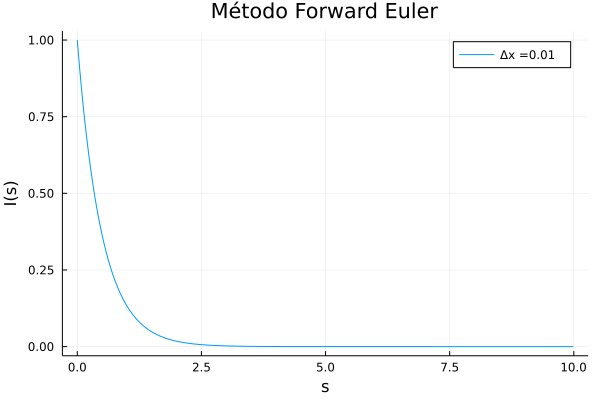

In [1]:
using Plots

function ODE(s,I)
    alpha = 2.  # Apsorption coefficient
    rhs = -alpha*I
    return rhs
end


function FEuler(ODE, t0, q0, tf, n)
    #=
    ------------------------------------------
    FEuler(t0, q0, tf, n)
    Forward Euler's method for solving a ODEs 
    system.
    ------------------------------------------
    Arguments:
    ODE:function with the ODE system 
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs 
    tf: final value
    n : Number of steps to perform
    ------------------------------------------
    Dependences: NumPy?
    ------------------------------------------
    =#
    dq = (tf - t0)/n
    q = zeros(n,(length(q0)+1)) 
    q[1,1] = t0
    q[1,2:length(q[1,:])] = q0[:]
    for i in 2:n
        q[i,1] = q[i-1,1] + dq
        q[i,2] = q[i-1,2] + dq*ODE(q[i-1,1], q[i-1,2])
    end
    return q
end

# Creation of the Grid
s_0 = 0.0
s_f = 10.0
n = 1000
#s = np.linspace(0., 10., n)
dx = (s_f - s_0)/n

# Variables setup
#I = np.zeros(n)

# Initial value
I_0 = [1.0]

# Main Loop
I = FEuler(ODE, s_0, I_0, s_f, n)

# Plot
plot(I[:,1], I[:,2], label="Δx =$dx ")
title!("Método Forward Euler")
xlabel!("s")
ylabel!("I(s)")

Ahora comprobaremos la estabilidad del método.

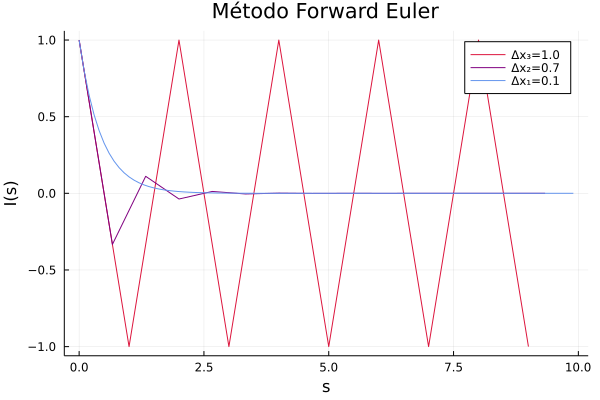

In [2]:
# Initial Condition
I_0 = [1.0]

# Creation of the grid
s_0 = 0.0
s_f = 10.0

# Three stepsizes to compare
n1 = 100
dx1 = (s_f - s_0)/n1

n2 = 15
dx2 = (s_f - s_0)/n2

n3 = 10
dx3 = (s_f - s_0)/n3


I1 = FEuler(ODE, s_0, I_0, s_f, n1)
I2 = FEuler(ODE, s_0, I_0, s_f, n2)
I3 = FEuler(ODE, s_0, I_0, s_f, n3)



plot(I3[:,1], I3[:,2], color="crimson", label="Δx₃=$dx3")
plot!(I2[:,1], I2[:,2], color="purple", label="Δx₂=$(round(dx2,digits=1))")
plot!(I1[:,1], I1[:,2], color="cornflowerblue", label="Δx₁=$dx1")
title!("Método Forward Euler")
xlabel!("s")
ylabel!("I(s)")

---
## Método Predictor-Corrector

Considere la siguiente modificación del método de Euler, 

\begin{equation}
y_{n+1} = y_{n} + h\, \frac{f(x_n, y_n) + f(x_{n+1},y_{n+1})}{2}\,\,.
\end{equation}

Esta puede dar un mejor estimado debido a que utiliza la *pendiente promedio* de $y$. 

Sin embargo, cabe notar que en este paso aún no se conoce $y_{n+1}$. Para evitar este inconveniente, se puede utilizar el método usual de forward Euler para estimar incialmente el valor de $y_{n+1}$ y luego, utilizar este valor en la modificación presentada arriba. De esta forma, el método completo tendría la estructura

\begin{equation}
\begin{aligned}
y_{n+1}^{(\mathrm{P})} &= y_n + h f(x_n,y_n)\,\,, & \text{(predictor)}\\
y_{n+1} &= y_n + \frac{h}{2} \left[f(x_n,y_n) + f(x_{n+1}, y^{(\mathrm{P})}_{n+1}) \right]\,\,. & \text{(corrector)}
\end{aligned}
\end{equation}

Es posible mostrar que el error del **método predictor-corrector**  es localmente de $\Delta x^3$ y globalmente de $\Delta x^2$.  Esto quiere decir que este método es preciso a segundo orden, mientras que Euler es preciso a primer orden. 

---
---

## Métodos  Runge-Kutta 

La idea detrás de los métodos Runge-Kutta (RK) es ajustar la expansión en serie de Taylor de $y(x)$ en $x=x_n$ hasta el orden más alto posible.


---
### RK2. Método RK de segundo orden

Para el sistema

\begin{equation}
\frac{dy}{dx} = f(x,y)\,\,,
\end{equation}

se considerará la iteración 

\begin{equation}
y_{n+1} = y_n + a k_1 + b k_2\,\,,
\end{equation}

donde

\begin{align}
k_1 &= \Delta x \,f(x_n,y_n)\,\,,\nonumber\\
k_2 &= \Delta x\,f(x_n+\alpha \Delta x,y_n + \beta k_1)\,\,.
\end{align}

Los cuatro parámetros desconocidos $a,b,\alpha,\beta$ se fijan de tal forma que la ecuación para $y_{n+1}$ concuerde con la expansión en serie de Taylor de $y' = f(x,y)$:

\begin{align}
y_{n+1} &= y_n + \Delta x y_n' + \frac{\Delta x^2}{2} y_n'' + \mathcal{O}(\Delta x^3)\,\,,\nonumber\\
&= y_n + \Delta x f(x_n,y_n) + \frac{\Delta x^2}{2} \frac{d}{dx} f(x_n,y_n) + \mathcal{O}(h^3)\,\,,\nonumber\\
&= y_n + \Delta x f_n + \Delta x^2 \frac{1}{2}\left( \frac{\partial f_n}{\partial x} + \frac{\partial f_n}{\partial y} f_n \right) + \mathcal{O}(\Delta x^3)\,\,,
\end{align}

donde $f_n = f(x_n,y_n)$. Al considerar la suposición hecha arriba,

\begin{equation}
y_{n+1} = y_n + a \Delta x f_n + b \Delta x f(x_n + \alpha \Delta x, y_n + \beta \Delta x f_n)\,\,.
\label{eq:rk2c}
\end{equation}

Al expandir el último término en serie de Taylor a primer orden $(x_n,y_n)$, se tiene

\begin{equation}
y_{n+1} = y_n + a \Delta x f_n + bh\left[ f_n + \frac{\partial f}{\partial x}(x_n,y_n) \alpha \Delta x + 
\frac{\partial f}{\partial y}(x_n,y_n) \beta \Delta x f_n \right]\,\,.
\end{equation}

Una comparaión directa de los resultados permite identificar las constantes 

\begin{equation}
a+b = 1\,\,,\hspace{2em} \alpha b = \frac{1}{2}\,\,\hspace{2em} \beta b = \frac{1}{2}\,\,.
\end{equation}


Sin embargo, se nota que solo se tienen 3 ecuaciones para determianr 4 parámetros. Esto quiere decir que tomando un valor arbitrario para uno de ellos, se fijan los restantes. Una elección típica es

\begin{equation}
\alpha = \beta = \frac{1}{2}\,\,,\hspace{2em} a=0\,\,, \hspace{2em} b = 1\,\,.
\end{equation}

Con esto se obtienen las ecuaciones del método RK2:

\begin{align}
k_1 & = \Delta x f(x_n,y_n)\,\,,\\
k_2 & = \Delta x f(x_n + \frac{1}{2}\Delta x, y_n + \frac{1}{2}k_1)\,\,,\\
y_{n+1} & = y_n + k_2 + \mathcal{O}(\Delta x^3)\,\,.
\end{align}

Este método es localmente  $\mathcal{O}(\Delta x^3)$ y globalmente $\mathcal{O}(\Delta x^2)$.

**Nota:** Utilizando $a=b=1/2$ y $\alpha=\beta=1$, se recupera el método predictor-corrector!

---

### RK3

\begin{align}
k_1 &= \Delta x f(x_n,y_n)\,\,\nonumber\\
k_2 &= \Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2} k_1)\,\,,\nonumber\\
k_3 &= \Delta x f(x_n + \Delta x, y_n - k_1 + 2 k_2)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 4 k_2 + k_3) + \mathcal{O}(\Delta x^4)\,\,.
\end{align}


--- 

### RK4

\begin{align}
k_1 &=\Delta x f(x_n,y_n)\,\,,\\
k_2 &=\Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2}k_1)\,\,,\nonumber\\
k_3 &=\Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2}k_2)\,\,,\nonumber\\
k_4 &=\Delta x f(x_n+\Delta x,y_n + k_3)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) + \mathcal{O}(\Delta x^5)\,\,.
\end{align}

---

### Ejemplo. Ecuación de Transferencia Radiativa

Considere de nuevo ODE de transferencia radiativa con un coeficiente de absorción.

\begin{equation}
\frac{dI}{ds} = -\alpha I\,\,, \hspace{1cm}\text{with} \hspace{1cm}  
I(0) = 1\,,\,\, \alpha > 0.
\end{equation}

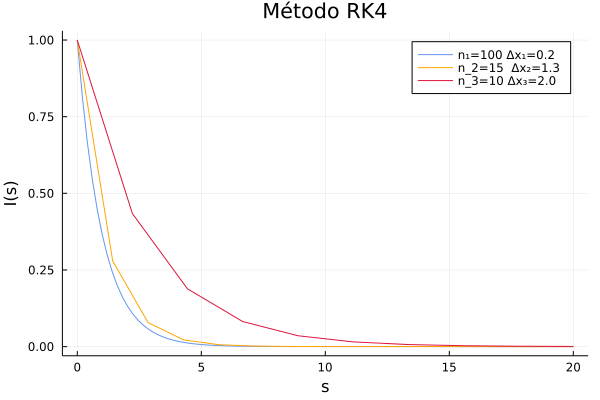

In [3]:
function ODE(I, s, alpha=1.0)
    rhs = -alpha*I
    return rhs
end

function RK4(f, y0, t)
    n = length(t)
    y = zeros(n,length(y0))
    y[1,:] .= y0
    for i in 1:n-1
        h = t[i+1] - t[i]
        k1 = f.(y[i,:], t[i])
        k2 = f.(y[i,:] + k1 * h/2, t[i] + h/2)
        k3 = f.(y[i,:] + k2 * h/2, t[i] + h/2)
        k4 = f.(y[i,:] + k3 * h, t[i] + h)
        y[i+1,:] = y[i,:] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    end
    return y
end


# Initial Condition
I_0 = 1.0

# Creation of the grid
s_0 = 0.0
s_f = 20.0

# Three stepsizes to compare
n1=100
dx1=(s_f - s_0)/n1
s1=LinRange(s_0,s_f,n1)

n2=15
dx2=(s_f - s_0)/n2
s2=LinRange(s_0,s_f,n2)

n3=10
dx3=(s_f - s_0)/n3
s3=LinRange(s_0,s_f,n3)


I1=RK4(ODE, I_0, s1)
I2=RK4(ODE, I_0, s2)
I3=RK4(ODE, I_0, s3)



plot(s1, I1, color="cornflowerblue", label="n₁=$(n1) Δx₁=$dx1")
plot!(s2, I2, color="orange", label="n_2=$(n2)  Δx₂=$(round(dx2,digits=1))")
plot!(s3, I3, color="crimson", label="n_3=$(n3) Δx₃=$dx3")
title!("Método RK4")
xlabel!("s")
ylabel!("I(s)")

## Métodos Runge-Kutta con paso adaptativo

Los métodos RK descritos arriba requieren la elección de un paso fijo $\Delta x$ pero, como se debe escoger su valor?

Adicionalmente, en algunas situaciones físicas puede ocurrir que, dentro de la dinámica del sistema, se puedan identificar regiones en las cuales la evolución se puede describir apropiadamente con pasos grandes y otras regiones en donde se necesite un paso mas pequeño para descibir adecuadamente el comportamiento. De esta forma, es posible introducir la idea de un **paso adpatativo** para integrar el sistema.

Una opción interesante es escoger un valor de **tolerancia al error** y dejar que el valor de $\Delta x$ sea elegido automáticamente para que el error del método este siempre dentro de esta tolerancia. 

Por ejemplo, si se elije una tolerancia al error de $\epsilon = 0.0001$ y al realizar un paso de la integración con un tamaño $\Delta x = 10$ se obtiene un error de $0.01$, es necesario disminuir el tamaño del paso para rehacer el calculo con un error por debajo de la tolerancia. Luego, al realizar un paso de integración en el cual el error se encuentra por debajo de $\epsilon$, se puede volver a aumentar $\Delta x$ para evitar que aumente el tiempo de computo.

Así, para implementar la idea del paso adaptativo es necesario definir:

1. Un método para estimar el error en cada paso.
2. Una forma de ajustar el tamaño del paso $\Delta x$ si el error es muy grande (o muy pequeño).

---

### Paso Adaptativo en RK4

Como primer ejemplo de un algoritmo con paso adaptativo, considere el método RK4 descrito arriba. 

Para iniciar, se toma un valor inicial $\Delta x$ y se realizan dos pasos RK4 con este valor (uno después del otro) para obtener el valor de la función $y^{(1)} = y(x+2\Delta x)$. 

Ahora, volvemos al valor inicial nuevamente y realizamos un solo avance con el método RK4 utilizando un paso de $\Delta ^*_x = 2\Delta x$ para obtener el valor de la función $y^{(2)}(x + \Delta^* x) = y^{(2)}(x+2\Delta x)$ el cual, en general debe ser diferente del valor obtenido antes, $y^{(1)}(x+2\Delta x)$. Comparando estos dos valores obtendremos un estimado del error asociado con los pasos dados.

Como ya sabemos, el método RK4 tiene una precisión de cuarto orden, es decir que el error que se tiene será de quinto orden. De esta forma, en un paso con tamaño $\Delta x$ se tiene un error $\sim c \Delta x^5$ donde $c$ es una constante. 

Al realizar dos pasos consecutivos de tamaño $\Delta x$, el valor real de la función, $y(t+2\Delta x)$ se relaciona con el obtenido por RK4 mediante la ecuación

\begin{equation}
y(t+2\Delta x) = y^{(1)} + 2 c \Delta x^5 .
\end{equation}

Por otra parte, al realizar solamente un paso de tamaño $2 \Delta x$ se tiene la relación

\begin{equation}
y(t+2\Delta x) = y^{(2)} +  c (2\Delta x)^5 = y^{(2)} + 32 c \Delta x^5.
\end{equation}

Ya que el valor real de la función es uno solo, igualamos estas ecuaciones para obtener

\begin{equation}
y^{(1)} +  2c \Delta x^5 = y^{(2)} + 32 c \Delta x^5
\end{equation}

\begin{equation}
y^{(1)} = y^{(2)} + 30 c \Delta x^5,
\end{equation}

lo cual implica que  el error por paso en pasos de tamaño $\Delta x$ será de

\begin{equation}
\delta = c \Delta x^5 =\frac{\left|y^{(1)}- y^{(2)}\right|}{30}.
\end{equation}

Cuando este error por paso es menor que la tolerancia definida, significa que el tamaño del paso utilizado es mas pequeño de lo deberia ser y por ello se esta perdidendo tiempo de computo. 

Por otra parte, si el error por paso es mayor que la tolerancia, debe disminuirse el tamaño del paso. Para ello consideramos un nuevo paso, denotado por $\Delta x_{new}$, para el cual se tendrá un error de

\begin{equation}
\delta_{new} = c \Delta x_{new}^5 = c \Delta x^5 \left( \frac{\Delta x_{new}}{\Delta x}\right)^5 =\frac{\left|y^{(1)}- y^{(2)}\right|}{30} \left( \frac{\Delta x_{new}}{\Delta x}\right)^5.
\end{equation}

Introducimos ahora el valor de tolerancia para un paso con el nuevo tamaño como  $\Delta x_{new} \epsilon$, de tal manera que exigimos que 

\begin{equation}
\frac{\left|y^{(1)}- y^{(2)}\right|}{30} \left( \frac{\Delta x_{new}}{\Delta x}\right)^5 \simeq \Delta x_{new} \epsilon.
\end{equation}

De esta ecuación obtenemos

\begin{equation}
\Delta x_{new} \simeq \left( \frac{30\epsilon \Delta x}{\left|y^{(1)}- y^{(2)}\right|} \right)^{1/4} \Delta x = \frac{1}{\Theta ^{1/4}} \Delta x,
\end{equation}

donde hemos definido

\begin{equation}
\Theta = \frac{\left|y^{(1)}- y^{(2)}\right|}{30\epsilon \Delta x} .
\end{equation}

La cantidad $\Theta$ corresponde a la razón entre la precisión actual, $\frac{\left|y^{(1)}- y^{(2)}\right|}{30}$, y la precisión deseada para un paso, $\epsilon \Delta x$. 

---
Habiendo definido todas las cantidades importantes, podemos resumir el método de pasos adaptativos así:

1. Se reralizan dos pasos de tamaño $\Delta x$ y luego, desde el mismo punto de partida, un paso de tamaño $2\Delta x$. con ello se obtienen los dos estimados $y^{(1)}$ y $y^{(2)}$.

2. Establecida una tolerancia $\epsilon$, se calcula la razón $\Theta$. 

- Si $\Theta < 1$, la precisión actual del paso RK es mejor que la tolerancia, por lo que el calculo es adecuado (porque cumple la condición de tolerancia) pero los pasos son más pequeños de lo que se necesita. El resultado se acepta y se mueve al paso $x + 2\Delta x$ para continuar el proceso pero se define un tamaño de paso más grande mediante la ecuación $\Delta x_{new}  = \frac{1}{\Theta ^{1/4}} \Delta x$.

- Si $\Theta >1$, la precisión actual del paso RK NO es aceptable de acuerdo con la tolerancia. De esta forma, el paso actual no es correcto y debe repetirse utilizando con un paso más pequeño dado por la condición $\Delta x_{new}  = \frac{1}{\Theta ^{1/4}} \Delta x$.

Es importante notar que la solución de la ecuación diferencial se obtiene a partir de los estimados $y^{(1)}$, construidos con los pasos de tamaño pequeño y por lo tanto tendrá una mejor precisión. El valor $y^{(2)}$ solo es utilizado para el calculo del error y NUNCA para construir la solución final.

Eventualmente puede ocurrir que los valores de $y^{(1)}$ y $y^{(2)}$ sean exactamente (o casi exactamente) iguales, con lo que el valor de $\Theta$ daría lugar a un nuevo paso $\Delta x_{new} = 0$ y el proceso de integración se interrumpiría. Para evitar que esto ocurra, es usual imponer un tamaño mínimo para el tamaño del paso o un valor máximo para el decremento (o incremento) que puede tener $\Delta x$ en cada uno de os pasos de integración.  


Finalmente, es importante notar que el método de paso adaptativo requiere un mayor número de calculos (se requieren al menos tres pasos RK por cada dos que realmente se utilizan en la construcción de la solución). Sin embargo, el esfuerzo extra permite obtener una solución con la precisión que se busca.

---
Habiendo definido todas las cantidades importantes, podemos resumir el método de pasos adaptativos así:

1. Se reralizan dos pasos de tamaño $\Delta x$ y luego, desde el mismo punto de partida, un paso de tamaño $2\Delta x$. con ello se obtienen los dos estimados $y^{(1)}$ y $y^{(2)}$.

2. Establecida una tolerancia $\epsilon$, se calcula la razón $\Theta$. 

- Si $\Theta < 1$, la precisión actual del paso RK es mejor que la tolerancia, por lo que el calculo es adecuado (porque cumple la condición de tolerancia) pero los pasos son más pequeños de lo que se necesita. El resultado se acepta y se mueve al paso $x + 2\Delta x$ para continuar el proceso pero se define un tamaño de paso más grande mediante la ecuación $\Delta x_{new}  = \frac{1}{\Theta ^{1/4}} \Delta x$.

- Si $\Theta >1$, la precisión actual del paso RK NO es aceptable de acuerdo con la tolerancia. De esta forma, el paso actual no es correcto y debe repetirse utilizando con un paso más pequeño dado por la condición $\Delta x_{new}  = \frac{1}{\Theta ^{1/4}} \Delta x$.

Es importante notar que la solución de la ecuación diferencial se obtiene a partir de los estimados $y^{(1)}$, construidos con los pasos de tamaño pequeño y por lo tanto tendrá una mejor precisión. El valor $y^{(2)}$ solo es utilizado para el calculo del error y NUNCA para construir la solución final.

Eventualmente puede ocurrir que los valores de $y^{(1)}$ y $y^{(2)}$ sean exactamente (o casi exactamente) iguales, con lo que el valor de $\Theta$ daría lugar a un nuevo paso $\Delta x_{new} = 0$ y el proceso de integración se interrumpiría. Para evitar que esto ocurra, es usual imponer un tamaño mínimo para el tamaño del paso o un valor máximo para el decremento (o incremento) que puede tener $\Delta x$ en cada uno de os pasos de integración.  


Finalmente, es importante notar que el método de paso adaptativo requiere un mayor número de calculos (se requieren al menos tres pasos RK por cada dos que realmente se utilizan en la construcción de la solución). Sin embargo, el esfuerzo extra permite obtener una solución con la precisión que se busca.
